In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from nd.plot_utils import (struct_weight_plot_nonlinear_N,
                           struct_weight_plot_nonlinear_k,
                           plot_fisher_nonlinear_2d,
                           plot_asymptotic_coefficients)

%matplotlib inline

In [2]:
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628', '#984ea3', 
          '#999999', '#e41a1c', '#dede00', '#006BA4', '#FF800E', '#ABABAB', 
          '#595959', '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', 
          '#CFCFCF']

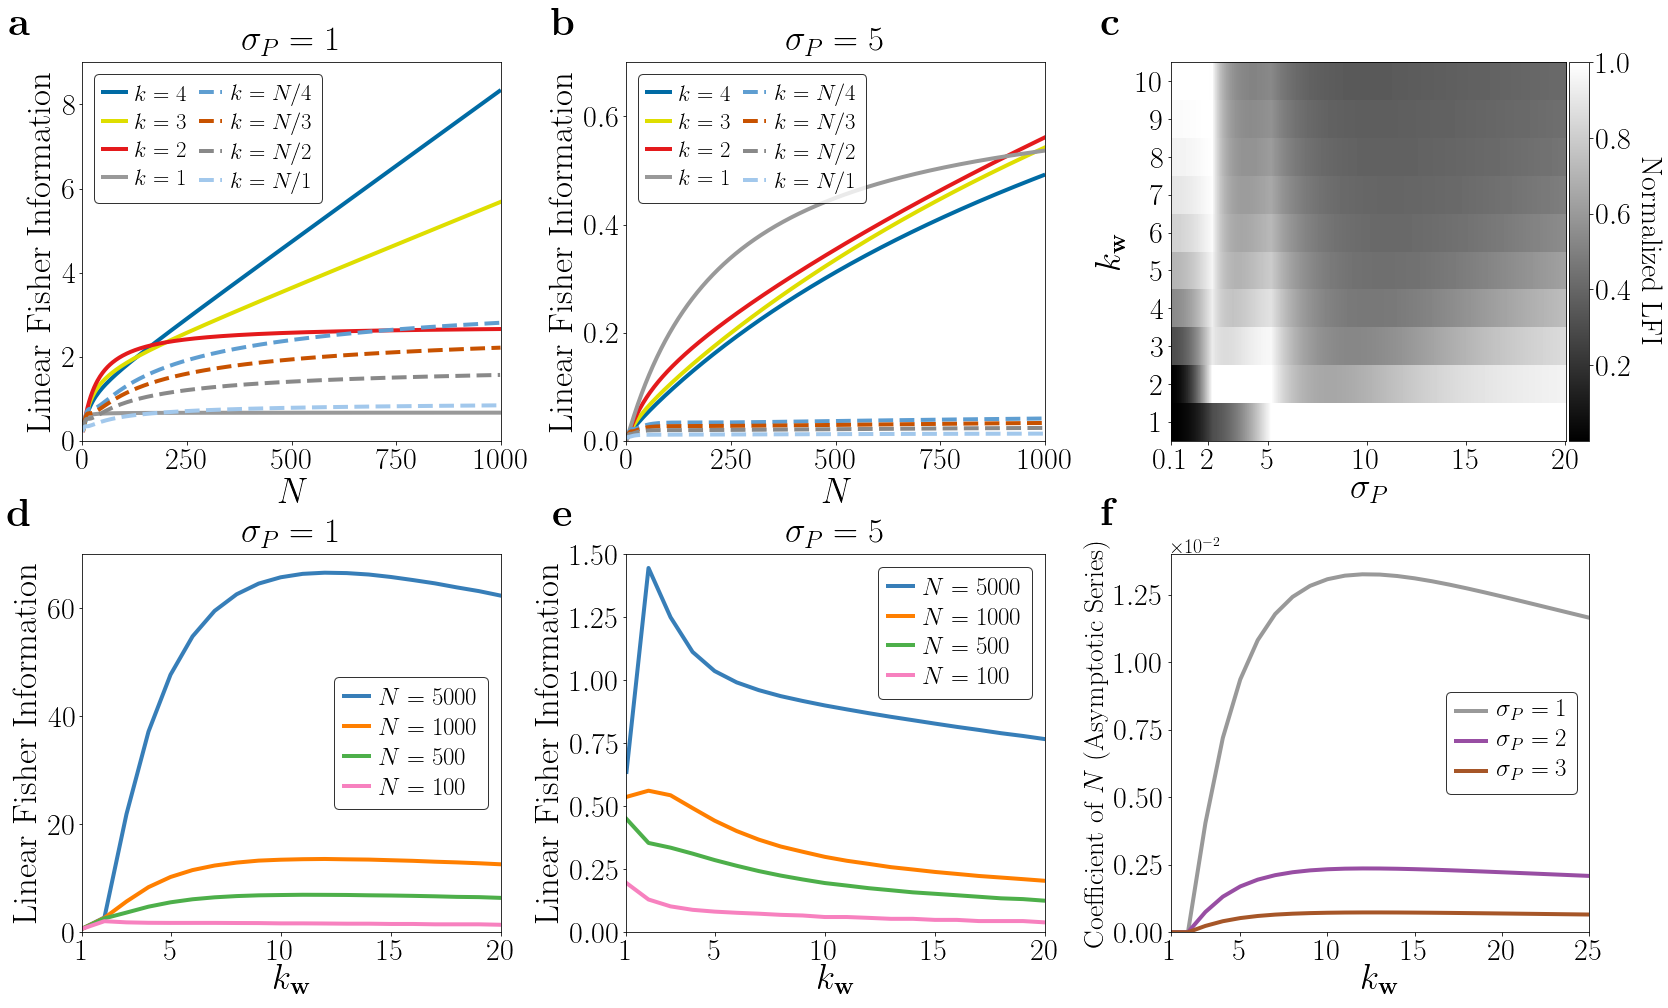

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(27,16))

# Figure 3a
struct_weight_plot_nonlinear_N(
    N_max=1000,
    ks=np.array([4, 3, 2, 1]),
    version=1,
    fax=(fig, axes[0, 0]),
    sigmaP=1.,
    colors=['#006BA4', '#999999', '#e41a1c', '#dede00'])

struct_weight_plot_nonlinear_N(
    N_max=1000,
    ks=np.array([4, 3, 2, 1]),
    version=2,
    fax=(fig, axes[0, 0]),
    sigmaP=1.,
    linestyle='--',
    colors=['#5F9ED1', '#C85200', '#898989', '#A2C8EC'])

axes[0, 0].set_xlim([0, 1000])
axes[0, 0].set_ylim([0, 9])
axes[0, 0].set_xlabel(r'$N$', fontsize=35)
axes[0, 0].set_ylabel('Linear Fisher Information', fontsize=35)
axes[0, 0].set_title(r'$\sigma_P=1$', fontsize=35)
axes[0, 0].tick_params(labelsize=30)


# Figure 3b
struct_weight_plot_nonlinear_N(
    N_max=1000,
    ks=np.array([4, 3, 2, 1]),
    version=1,
    fax=(fig, axes[0, 1]),
    sigmaP=5.,
    colors=['#006BA4', '#999999', '#e41a1c', '#dede00'])

struct_weight_plot_nonlinear_N(
    N_max=1000,
    ks=np.array([4, 3, 2, 1]),
    version=2,
    fax=(fig, axes[0, 1]),
    linestyle='--',
    sigmaP=5.,
    colors=['#5F9ED1', '#C85200', '#898989', '#A2C8EC'])

axes[0, 1].set_xlim([0, 1000])
axes[0, 1].set_ylim([0, 0.7])
axes[0, 1].set_xlabel(r'$N$', fontsize=35)
axes[0, 1].set_ylabel('Linear Fisher Information', fontsize=35)
axes[0, 1].set_title(r'$\sigma_P=5$', fontsize=35)
axes[0, 1].tick_params(labelsize=30)


# Figure 3c
ratios = np.linspace(0.1, 20, 1000)
ks = np.arange(1, 11)
img = plot_fisher_nonlinear_2d(
    N=1000, ratios=ratios, ks=ks, s=1., version=1, fax=(fig, axes[0, 2]))

axes[0,2].set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axes[0,2].set_yticklabels(np.arange(1, 11))
axes[0,2].set_xticks([0, 95, 246, 497, 748, 999])
axes[0,2].set_xticklabels([0.1, 2, 5, 10, 15, 20])
axes[0,2].set_aspect('auto')
axes[0,2].set_xlabel(r'$\sigma_P$', fontsize=35)
axes[0,2].set_ylabel(r'$k_{\mathbf{w}}$', fontsize=35)
axes[0,2].tick_params(labelsize=30)

# create colorbar
divider = make_axes_locatable(axes[0, 2])
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(img, cax=cax)
cb.ax.set_ylabel(r'Normalized LFI', fontsize=30, rotation=270, labelpad=30)
cb.ax.tick_params(labelsize=30) 


# Figure 3d
struct_weight_plot_nonlinear_k(
    Ns=np.array([5000, 1000, 500, 100]),
    ks=np.arange(1, 21),
    fax=(fig, axes[1, 0]),
    sigmaP=1.)

axes[1, 0].set_xlim(1, 20)
axes[1, 0].set_ylim(0, 70)
axes[1, 0].set_xticks([1, 5, 10, 15, 20])
axes[1, 0].set_xlabel(r'$k_{\mathbf{w}}$', fontsize=35)
axes[1, 0].set_ylabel('Linear Fisher Information', fontsize=35)
axes[1, 0].set_title(r'$\sigma_P=1$', fontsize=35)
axes[1, 0].tick_params(labelsize=30)


# Figure 3e
struct_weight_plot_nonlinear_k(
    Ns=np.array([5000, 1000, 500, 100]),
    ks=np.arange(1, 21),
    fax=(fig, axes[1, 1]),
    sigmaP=5.)

axes[1, 1].set_xlim(1, 20)
axes[1, 1].set_ylim(0, 1.5)
axes[1, 1].set_xticks([1, 5, 10, 15, 20])
axes[1, 1].set_title(r'$\sigma_P=5$', fontsize=35)
axes[1, 1].set_xlabel(r'$k_{\mathbf{w}}$', fontsize=35)
axes[1, 1].set_ylabel('Linear Fisher Information', fontsize=35)
axes[1, 1].tick_params(labelsize=30)


# Figure 3f
plot_asymptotic_coefficients('../data/asymptotic_coefficients.h5', fax=(fig, axes[1, 2]))
axes[1, 2].set_xlim([1, 10])
axes[1, 2].tick_params(labelsize=20)
axes[1, 2].set_xlabel(r'$k_{\mathbf{w}}$', fontsize=35)
axes[1, 2].set_ylabel(r'Coefficient of $N$ (Asymptotic Series)', fontsize=28)
axes[1, 2].tick_params(labelsize=30)
axes[1, 2].set_xticks([1, 5, 10, 15, 20, 25])
axes[1, 2].set_ylim([0, 0.014])
axes[1, 2].ticklabel_format(axis='y', style='sci', scilimits=(0, 0))


# subplot labels
axes[0, 0].text(
    x=-0.15, y=1.1, s=r'\textbf{a}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center', 
    transform=axes[0, 0].transAxes)

axes[0, 1].text(
    x=-0.15, y=1.1, s=r'\textbf{b}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 1].transAxes)

axes[0, 2].text(
    x=-0.15, y=1.1, s=r'\textbf{c}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 2].transAxes)

axes[1 ,0].text(
    x=-0.15, y=1.1, s=r'\textbf{d}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 0].transAxes)

axes[1, 1].text(
    x=-0.15, y=1.1, s=r'\textbf{e}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 1].transAxes)

axes[1, 2].text(
    x=-0.15, y=1.1, s=r'\textbf{f}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 2].transAxes)

plt.subplots_adjust(hspace=0.3, wspace=0.3)

plt.savefig('figure4.pdf', bbox_inches='tight')